In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1160,2020-07-29,United Kingdom,301097.0,300692.0,45834.0,45878.0,405.0,-44.0
1161,2020-07-29,Germany,206651.0,206926.0,9131.0,9128.0,-275.0,3.0
1162,2020-07-29,Iran,297147.0,296273.0,16111.0,16147.0,874.0,-36.0
1163,2020-07-29,Turkey,227903.0,227982.0,5646.0,5645.0,-79.0,1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3649.9218884120173
RMSE =  10922.825546855476


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  291.75622317596566
RMSE =  687.8810120182698


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  20408.339285714286
RMSE =  31892.15223693082
-- World performances for deaths --
MAE =  1564.9732142857142
RMSE =  1904.601076059911


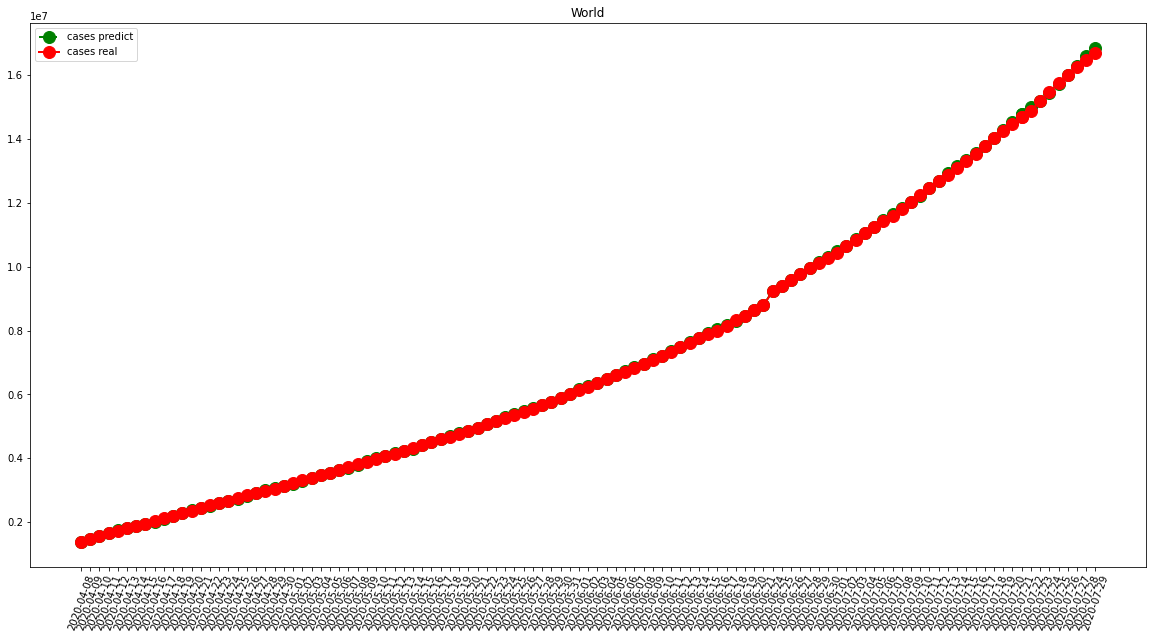

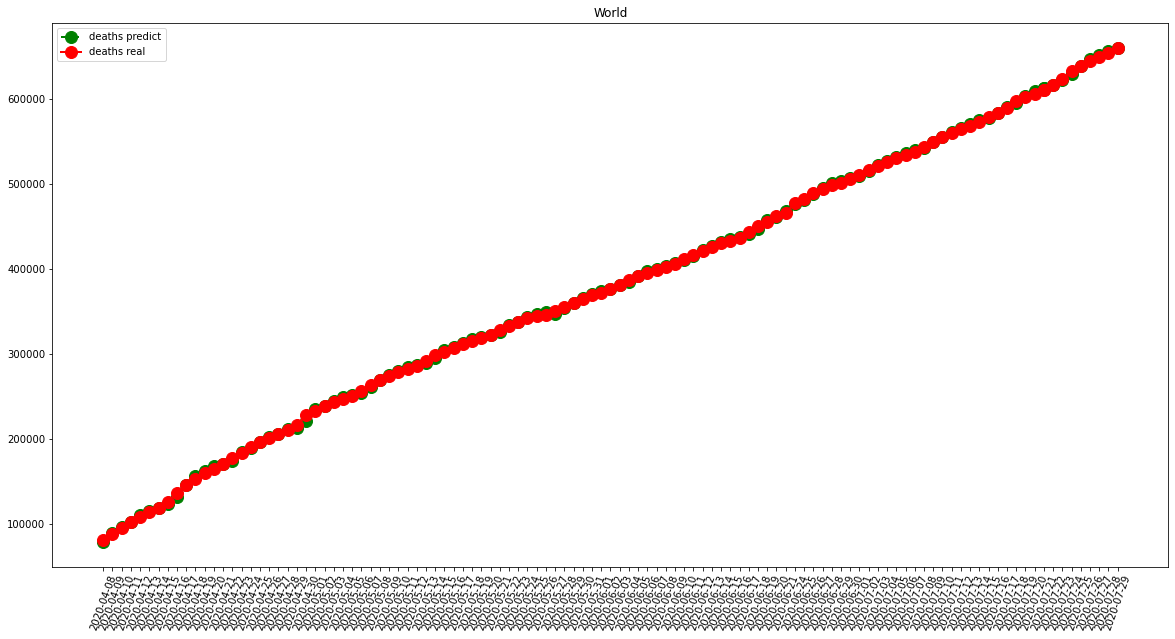

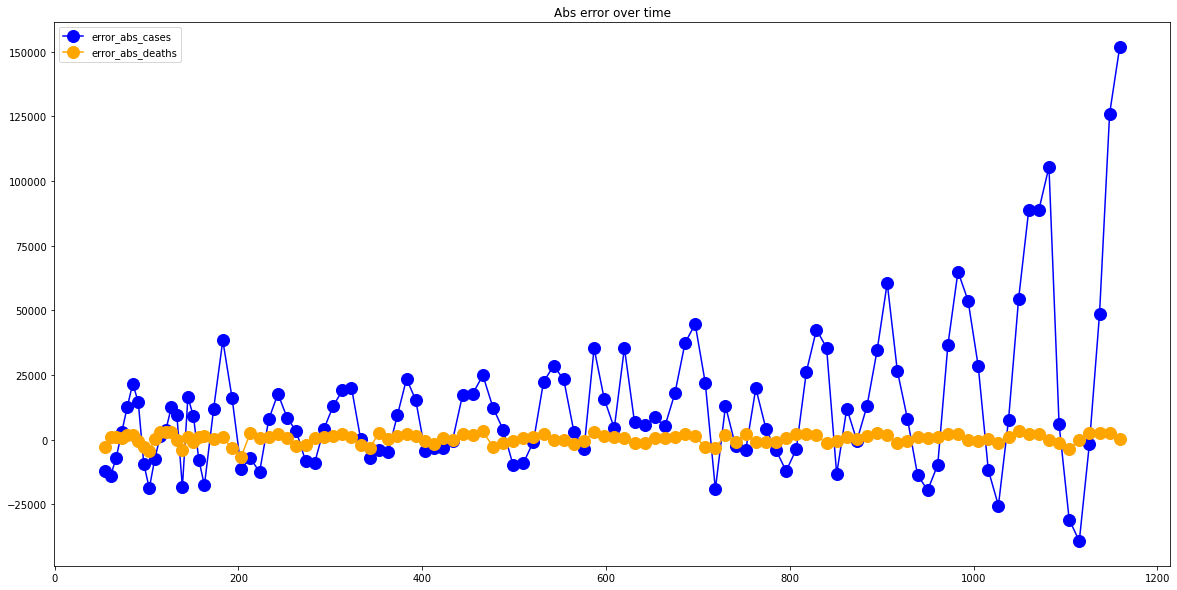

In [7]:
visShow("World")

-- France performances for cases --
MAE =  854.7704918032787
RMSE =  1373.5077744801363
-- France performances for deaths --
MAE =  147.75409836065575
RMSE =  303.42212115558976


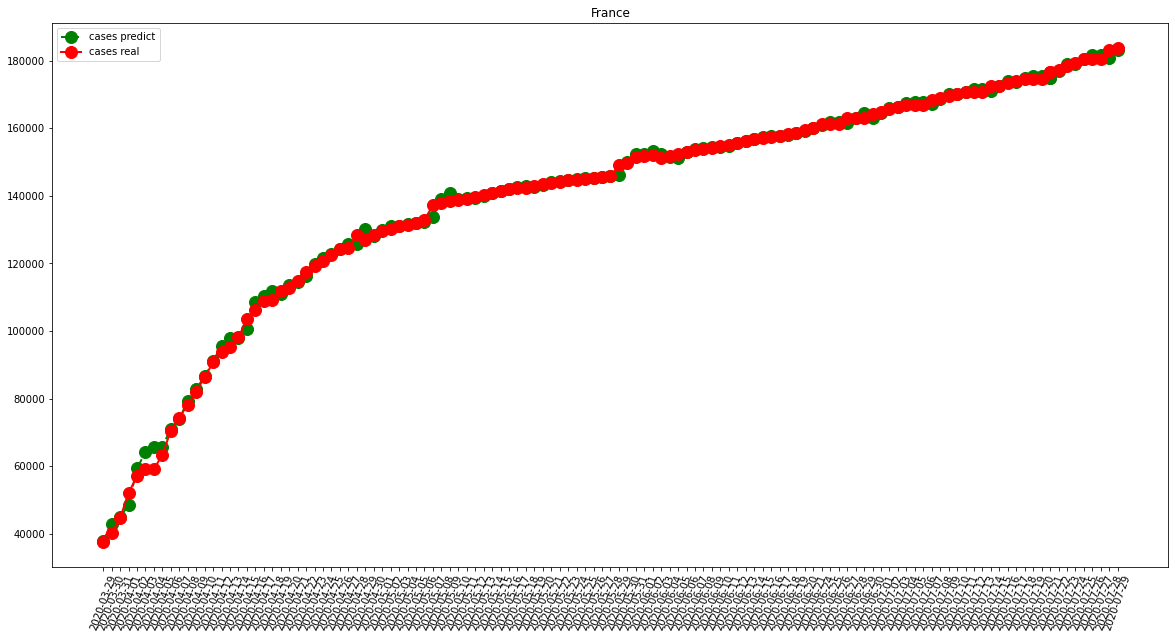

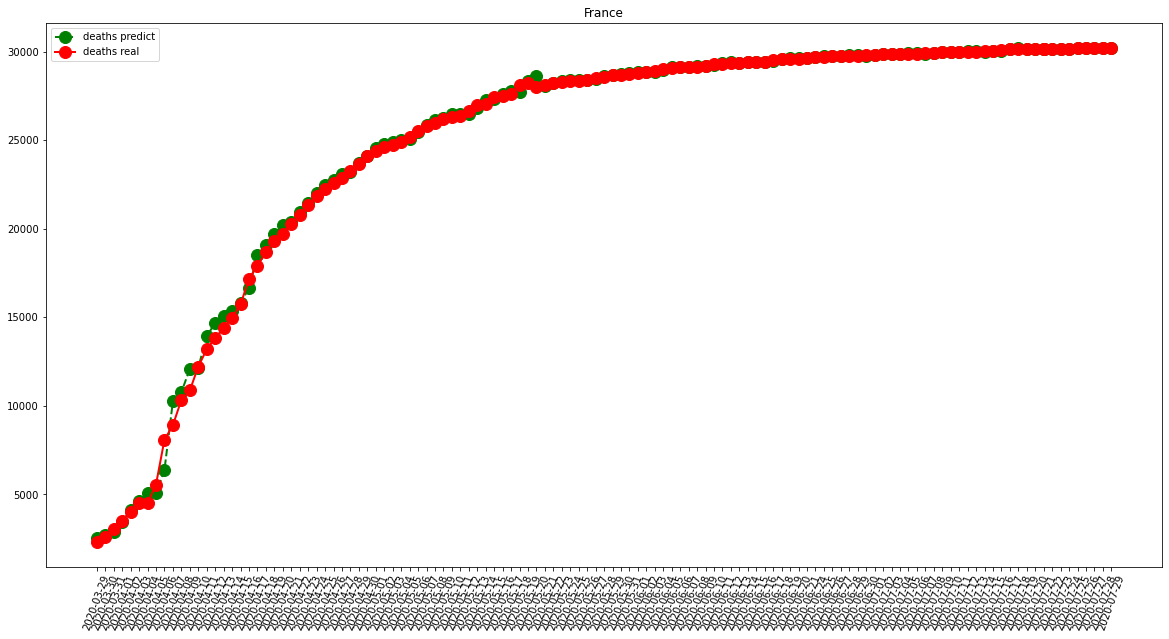

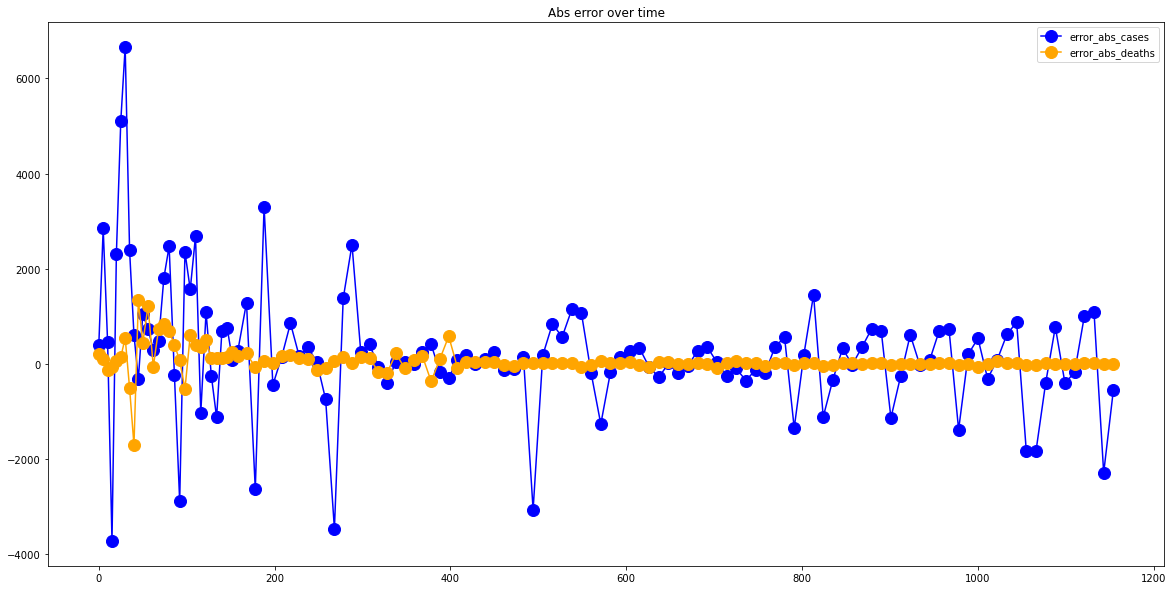

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  328.4344262295082
RMSE =  494.86438778223066
-- Italy performances for deaths --
MAE =  84.24590163934427
RMSE =  267.9506010259427


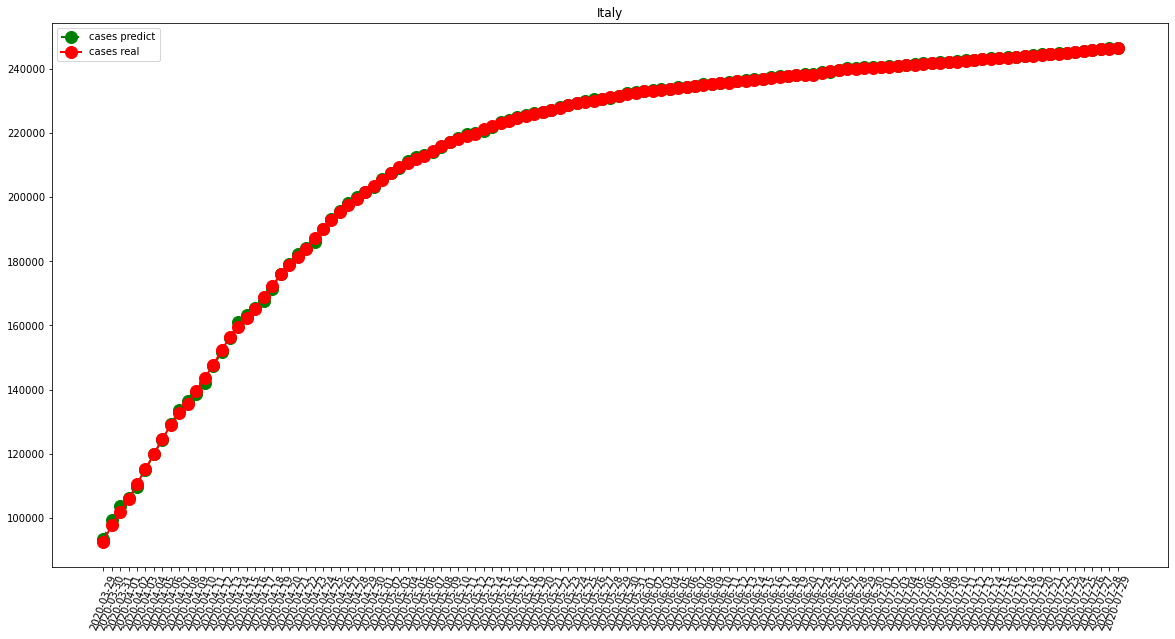

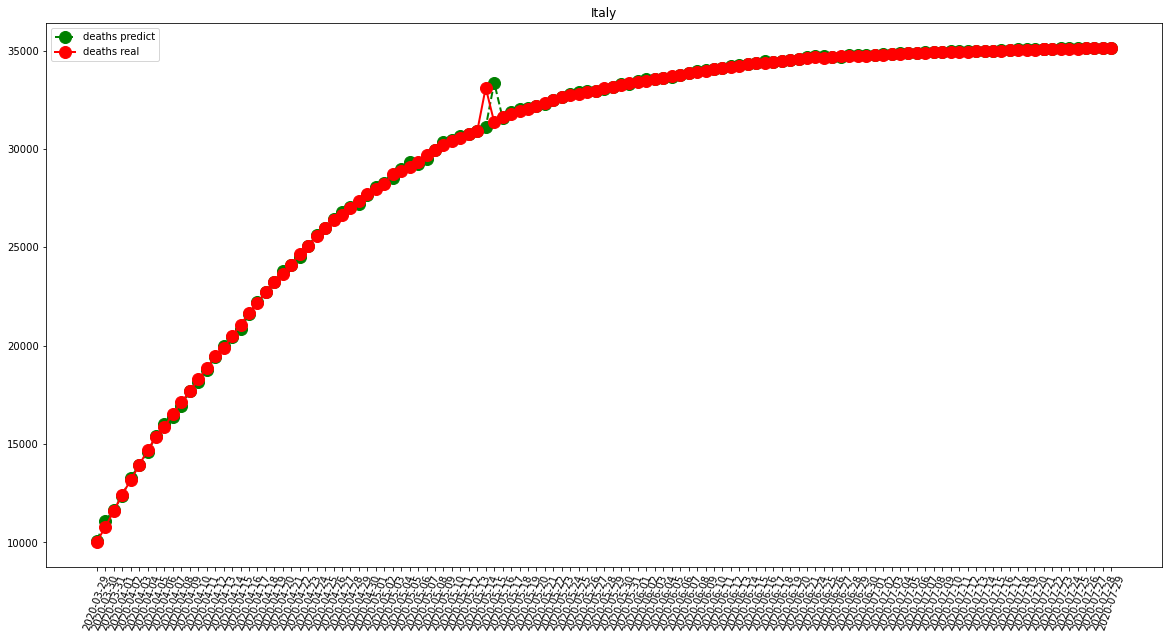

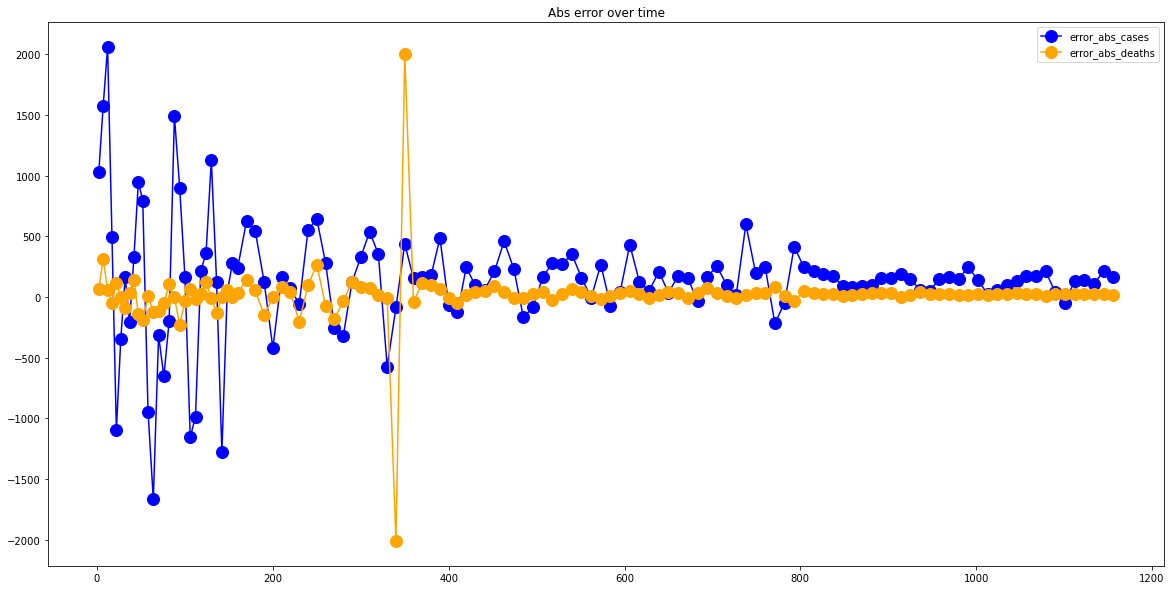

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1010.344262295082
RMSE =  2092.450183514963
-- Spain performances for deaths --
MAE =  150.79508196721312
RMSE =  367.5039087558385


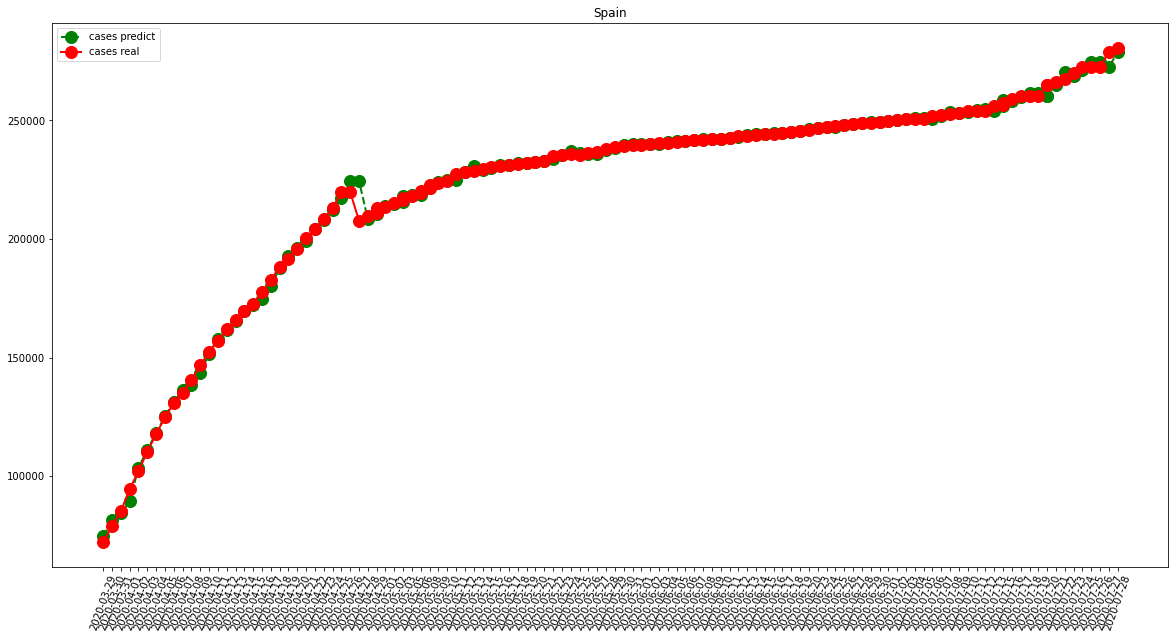

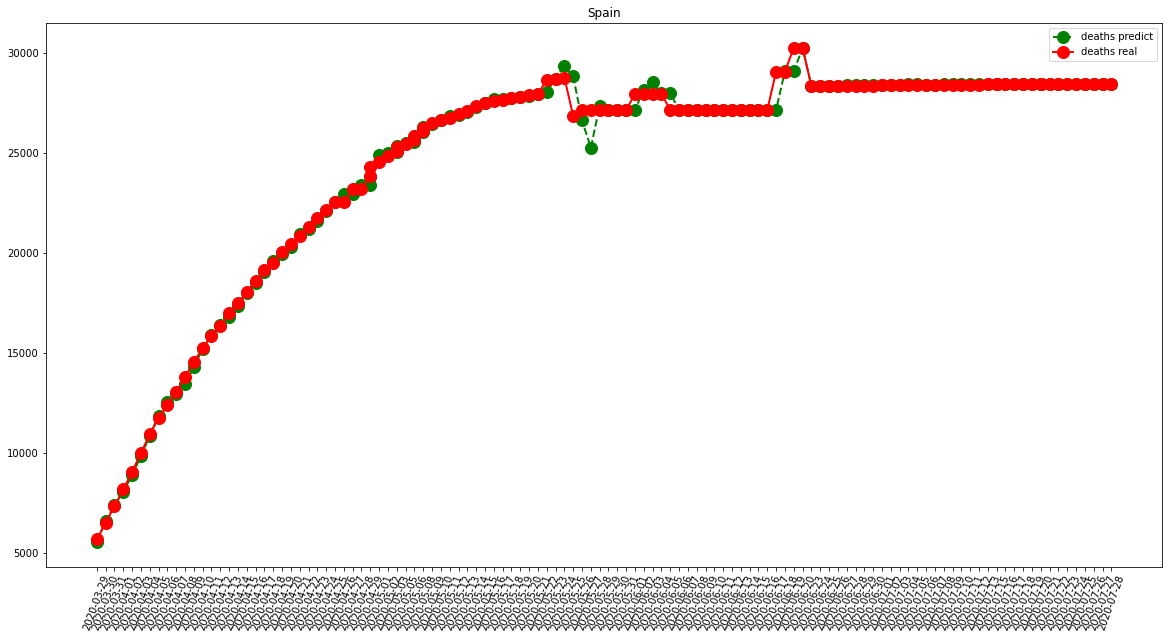

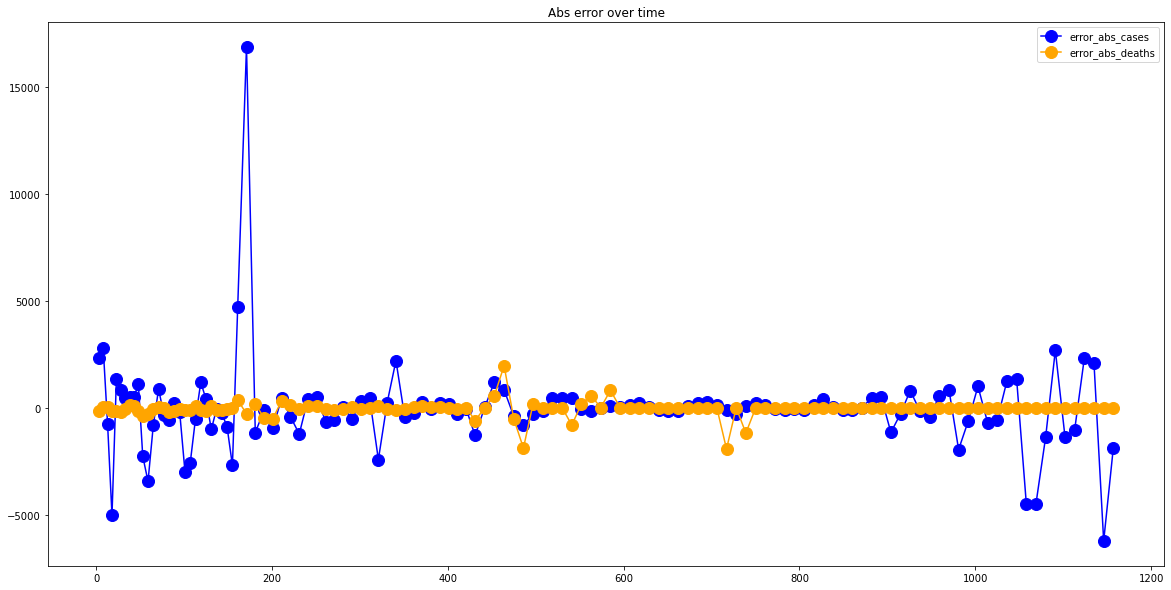

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5771.6557377049185
RMSE =  7738.8093007543885
-- United States performances for deaths --
MAE =  503.1639344262295
RMSE =  729.2515813163925


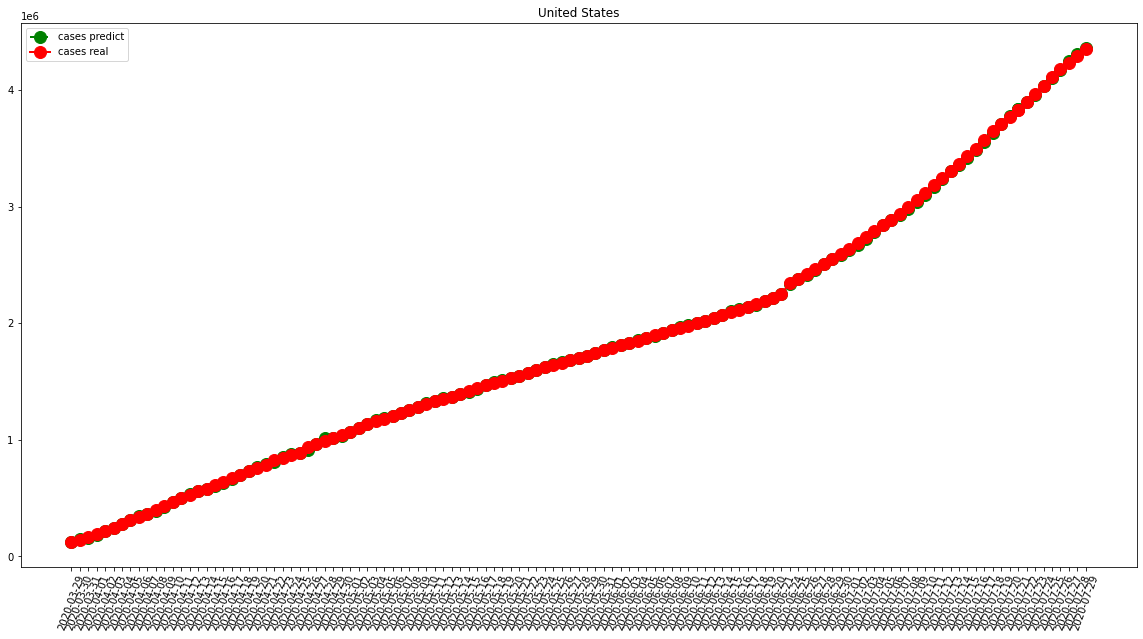

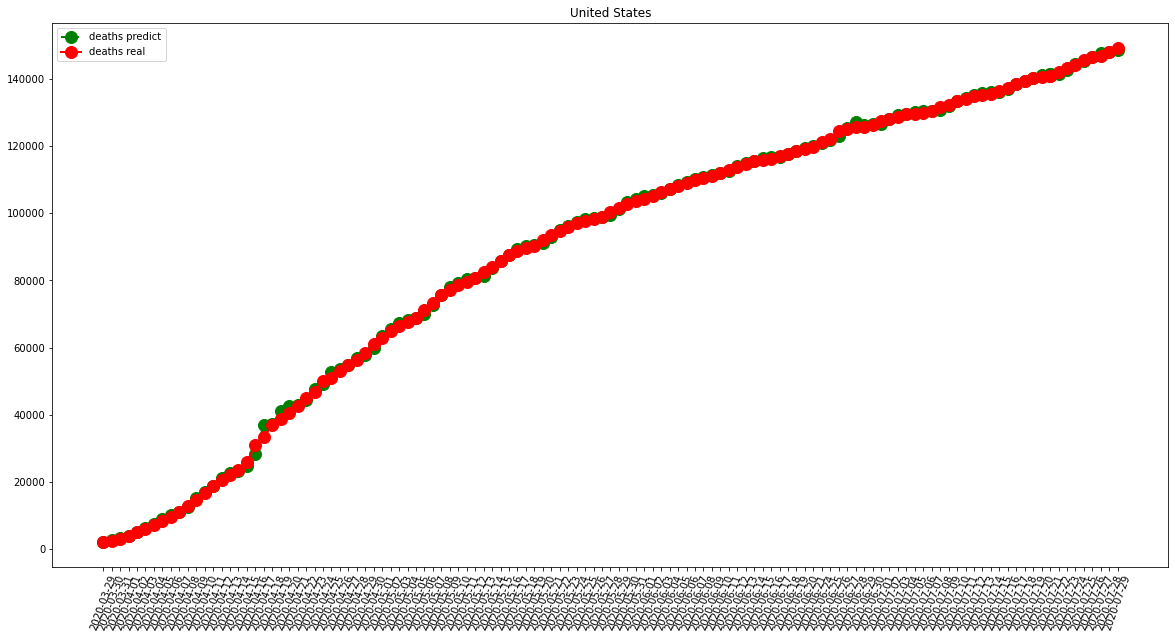

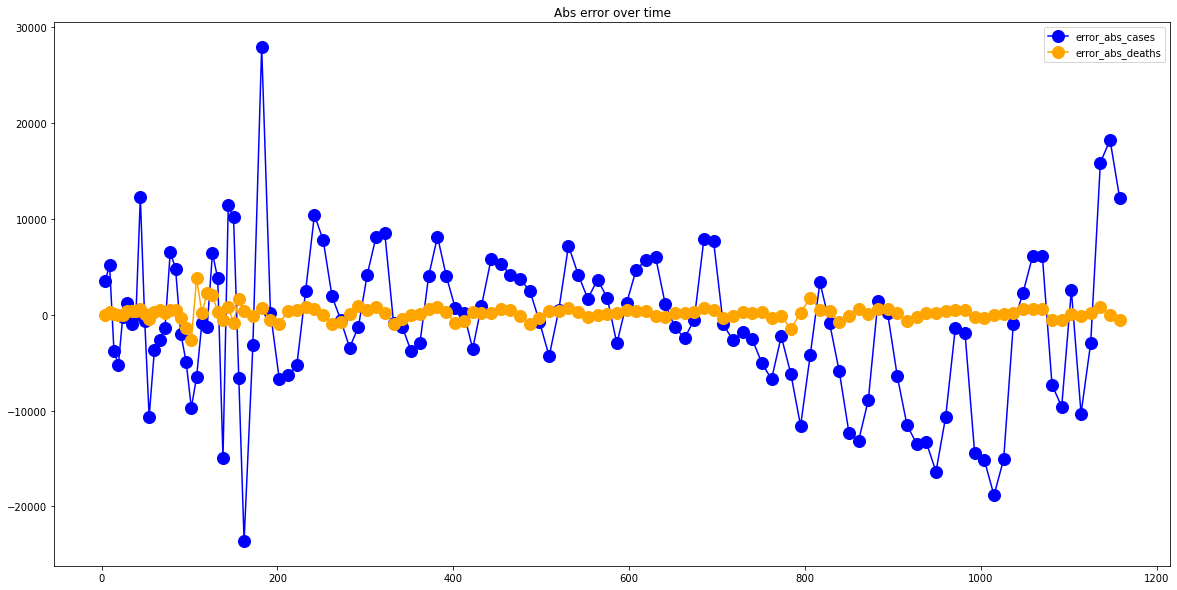

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  78.4672131147541
RMSE =  107.64616445239224
-- China performances for deaths --
MAE =  32.90983606557377
RMSE =  142.1367674310124


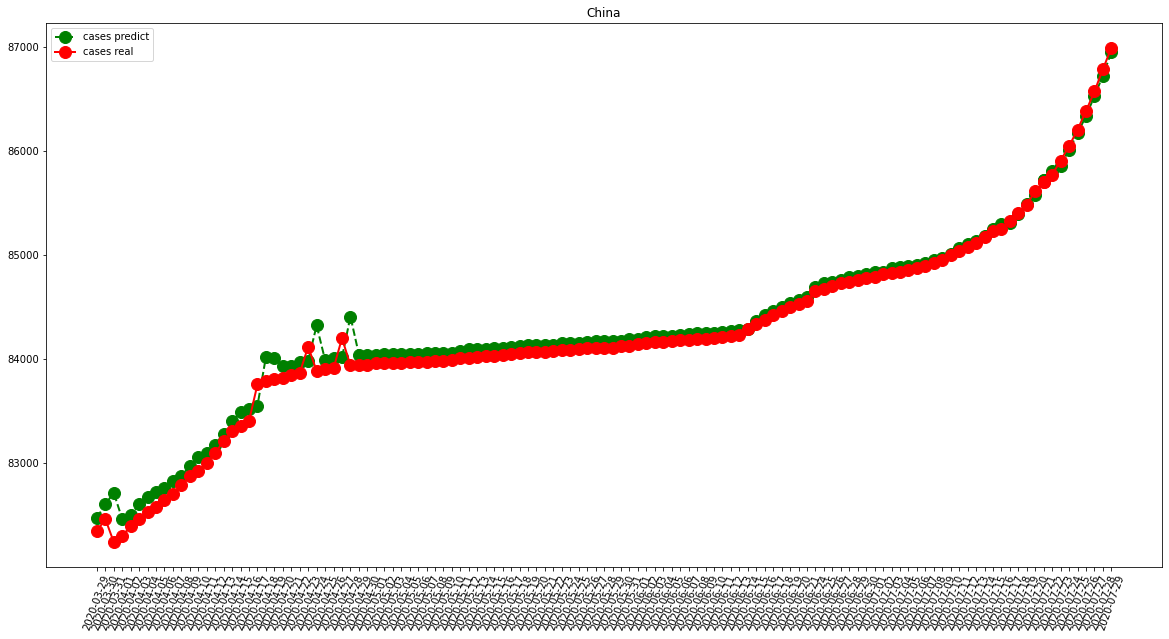

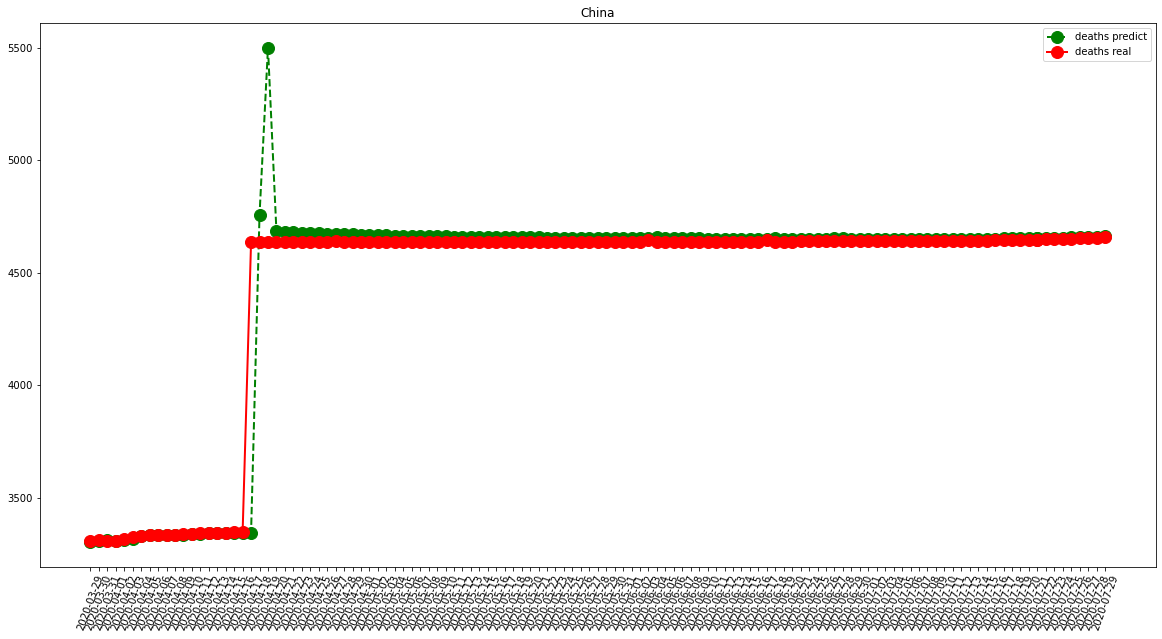

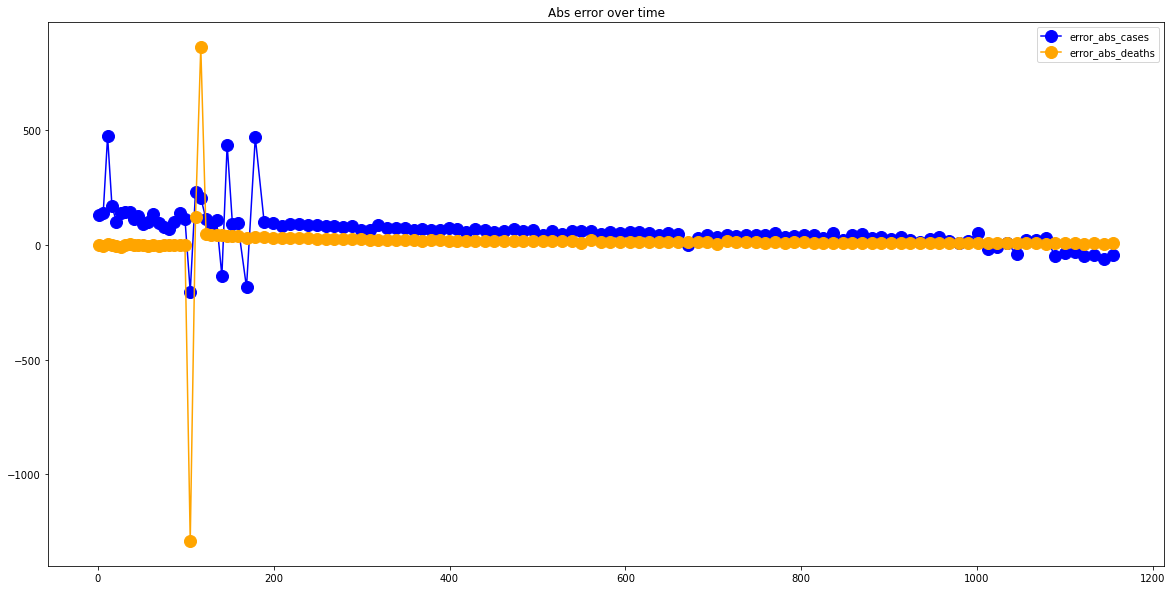

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1301.787234042553
RMSE =  4304.696257849144
-- United Kingdom performances for deaths --
MAE =  203.5
RMSE =  506.18610445213284


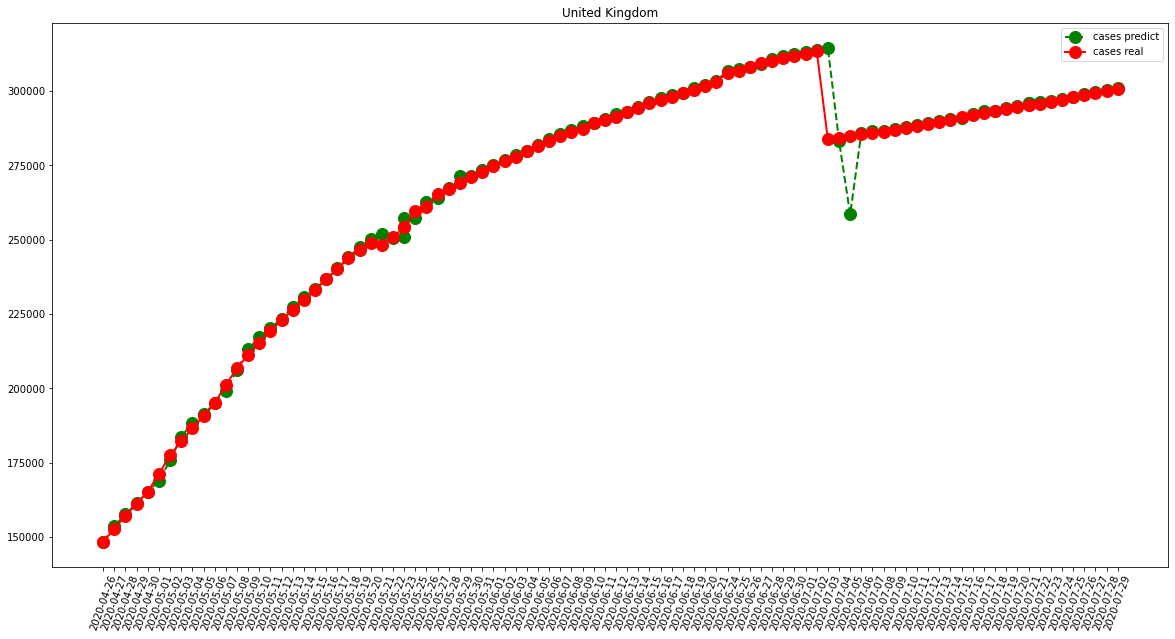

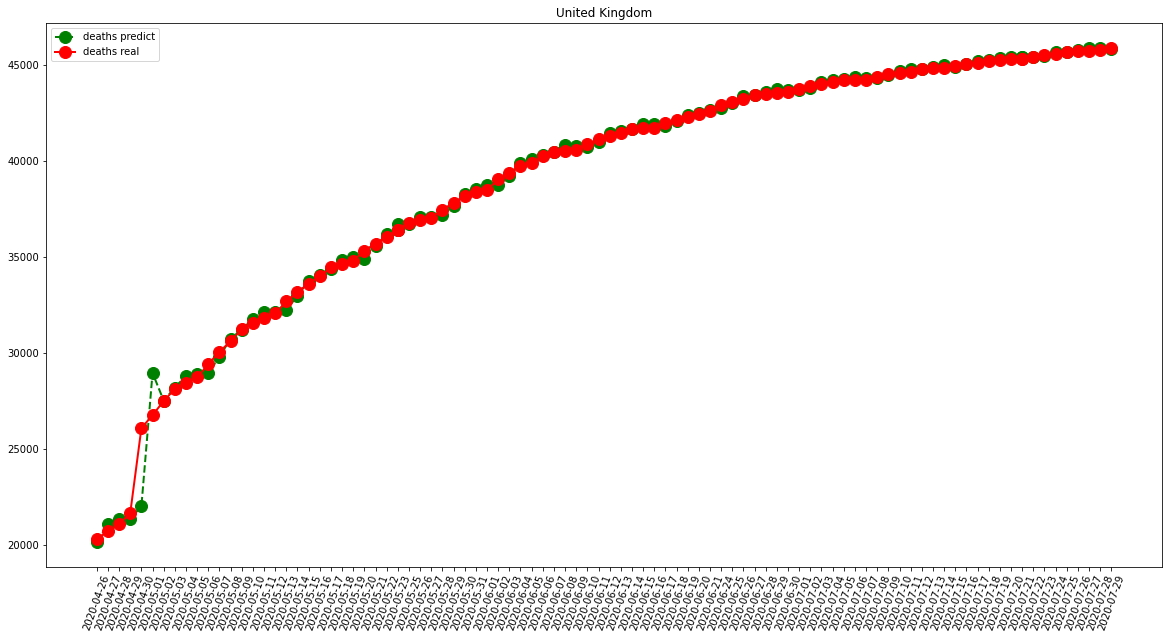

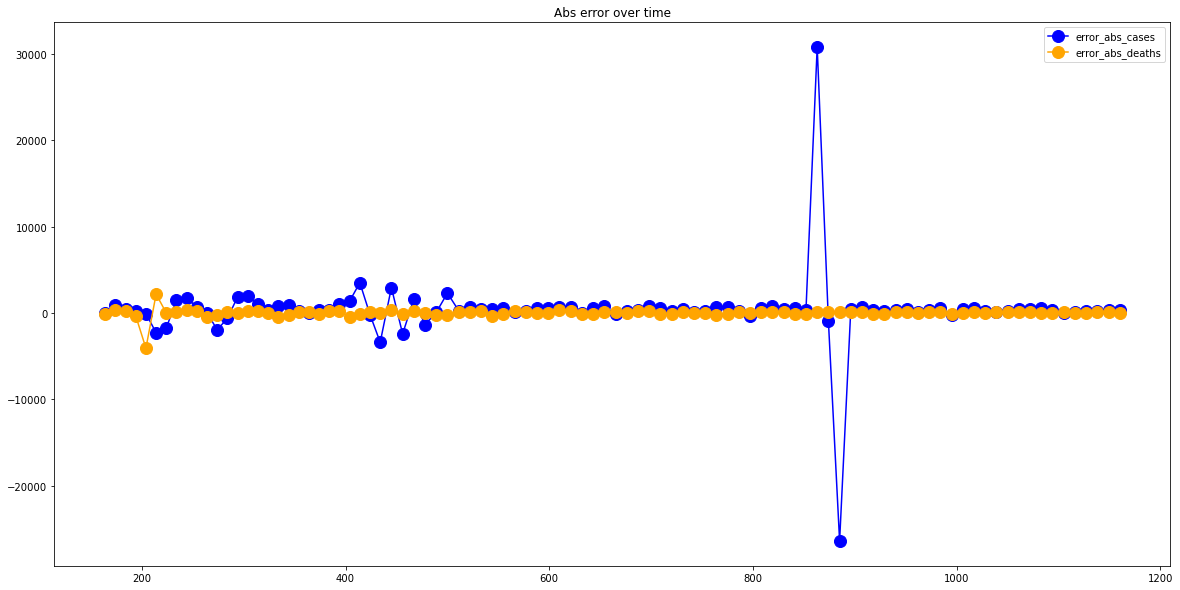

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  293.97872340425533
RMSE =  406.71567255009035
-- Germany performances for deaths --
MAE =  25.72340425531915
RMSE =  45.091632473763205


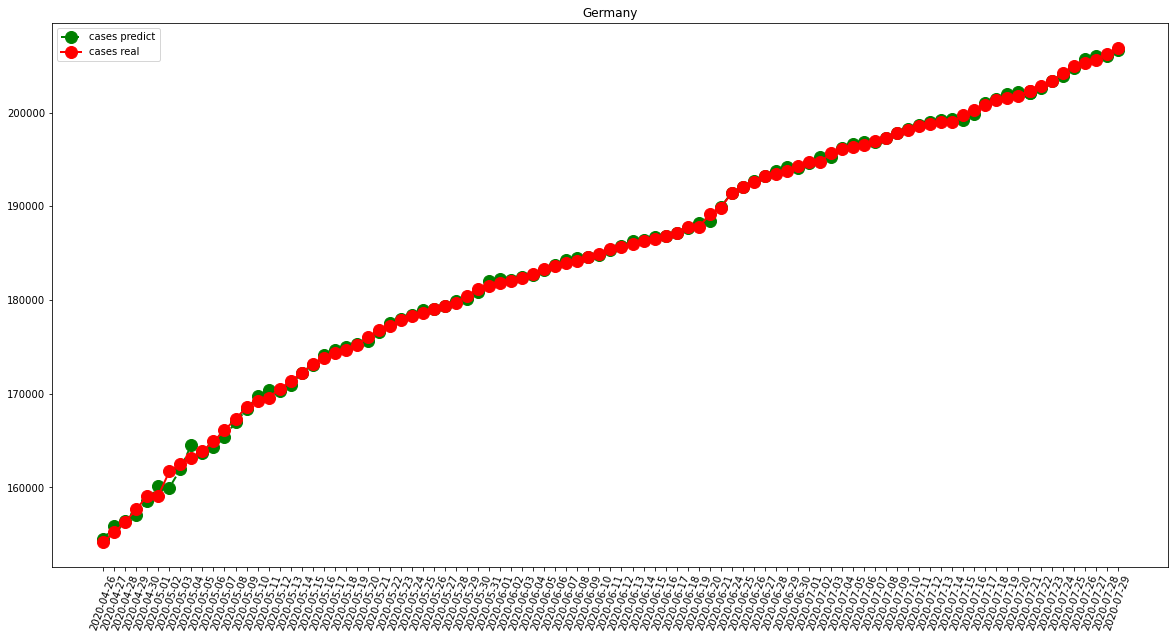

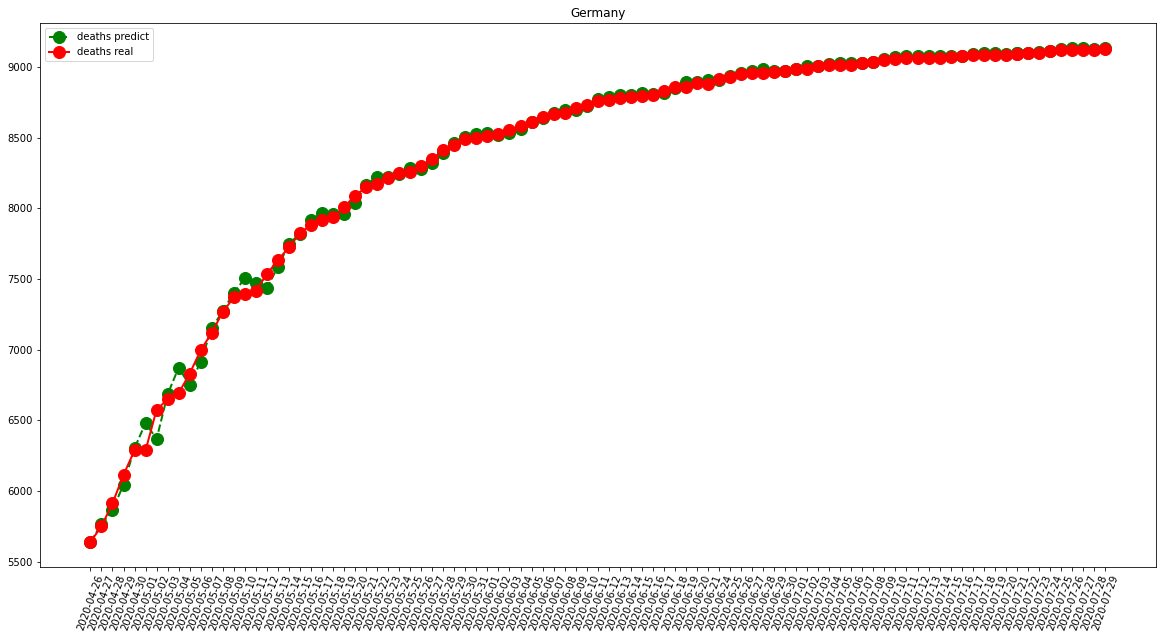

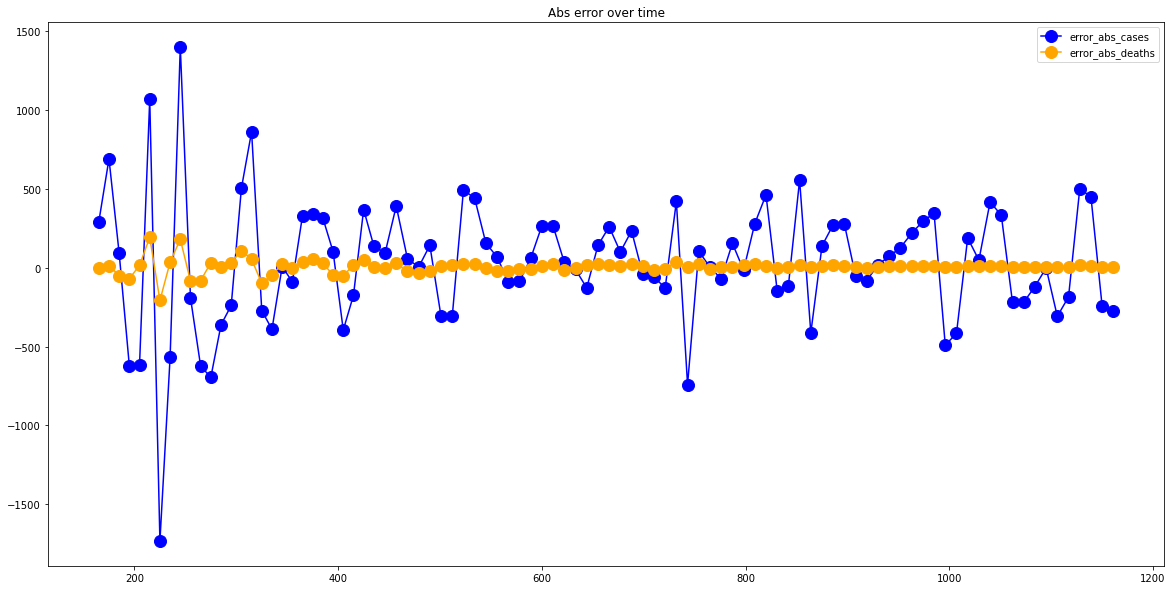

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  545.6489361702128
RMSE =  871.361779666649
-- Iran performances for deaths --
MAE =  31.76595744680851
RMSE =  70.04238838169903


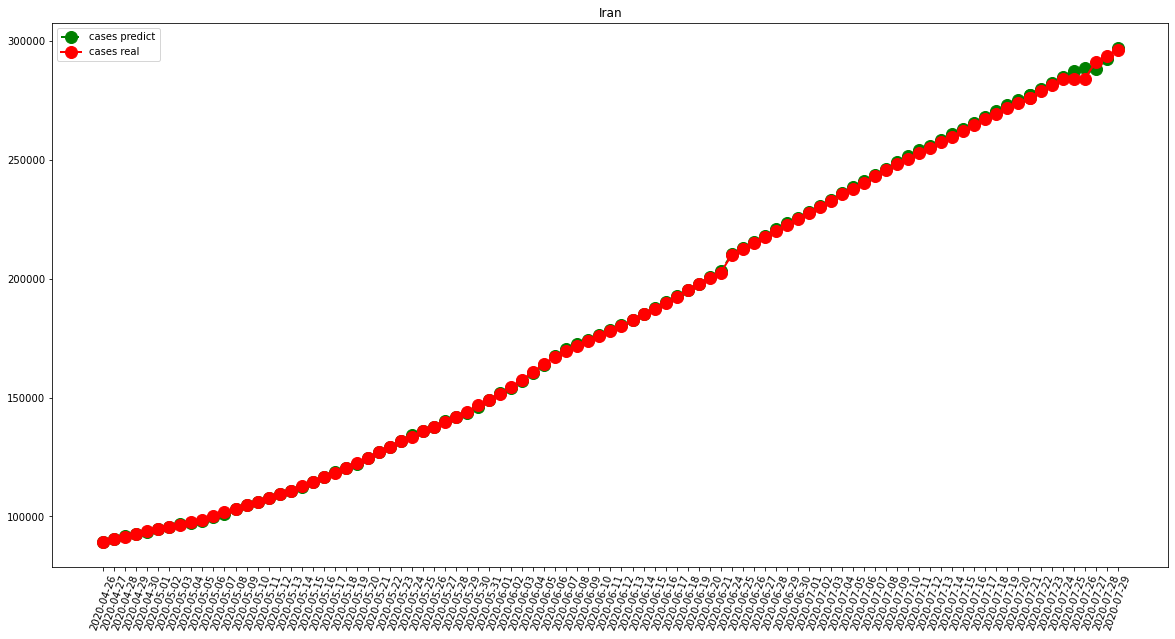

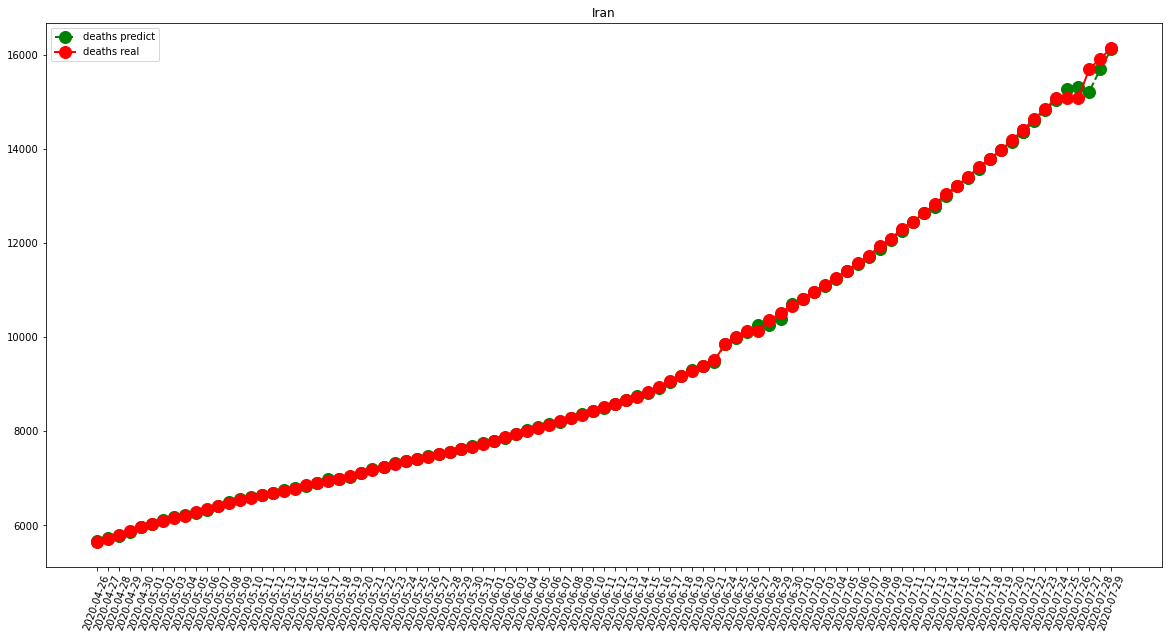

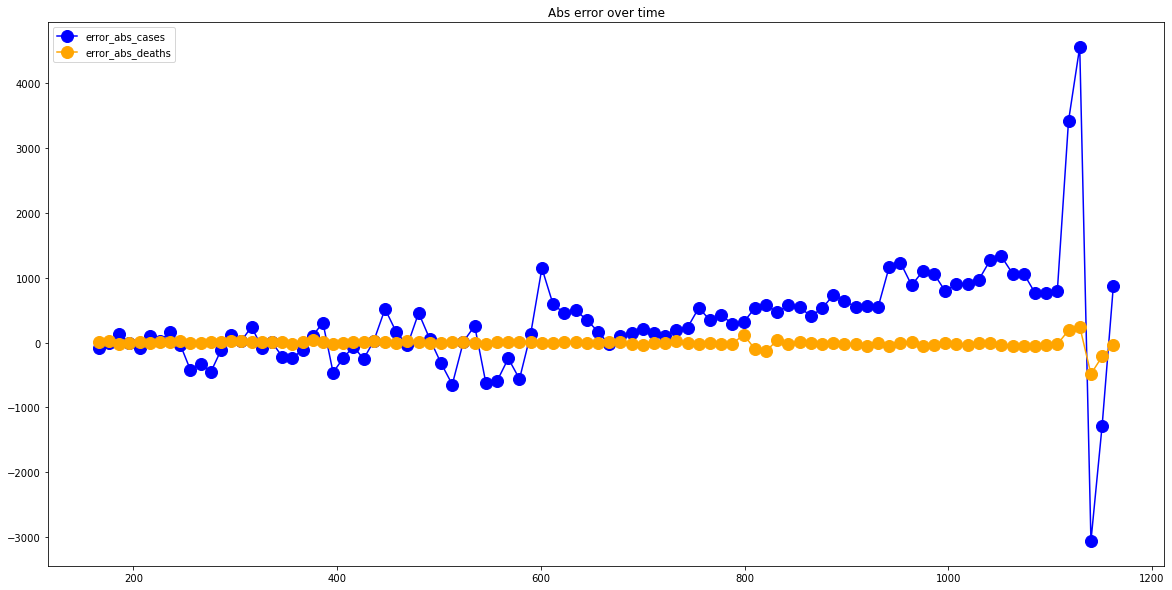

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  206.06382978723406
RMSE =  354.6197544028899
-- Turkey performances for deaths --
MAE =  20.01063829787234
RMSE =  104.69758882793327


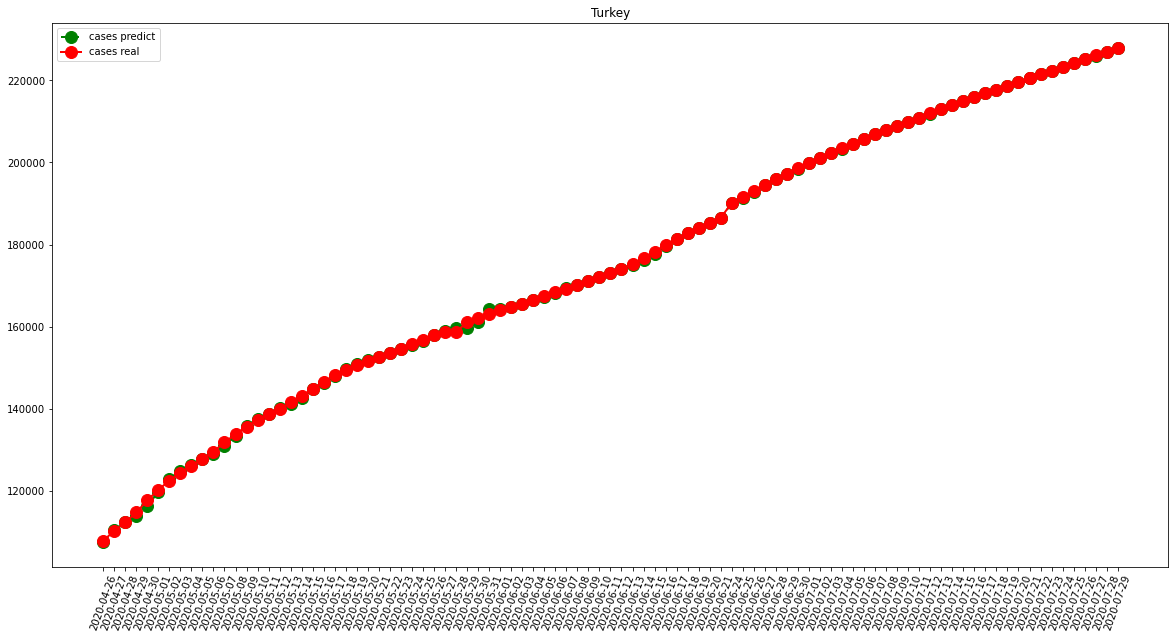

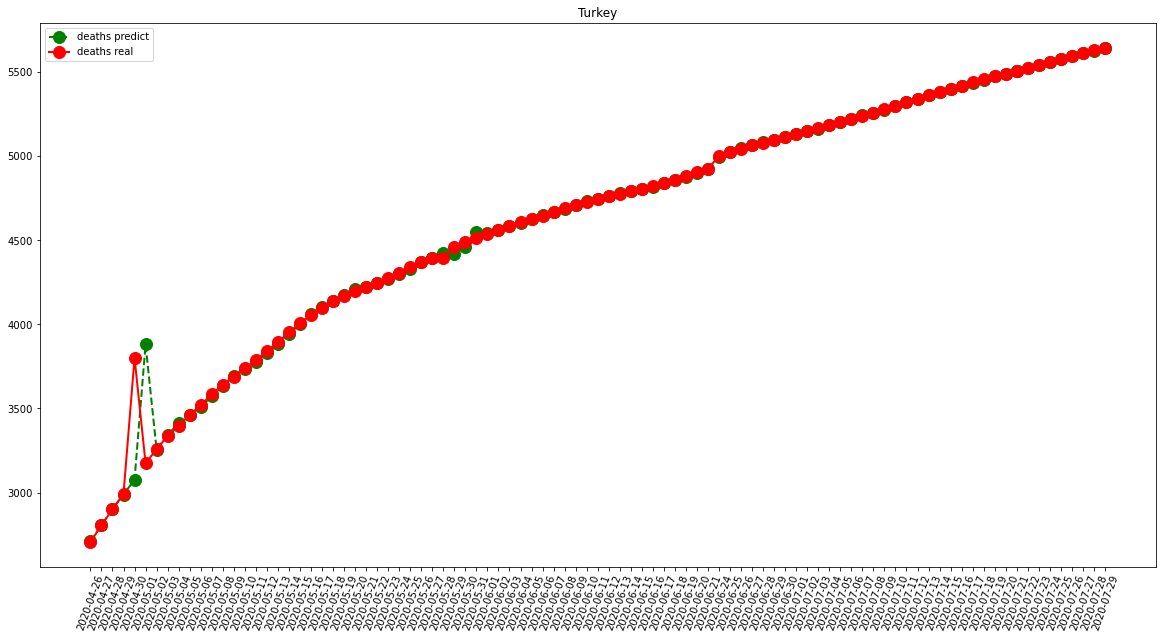

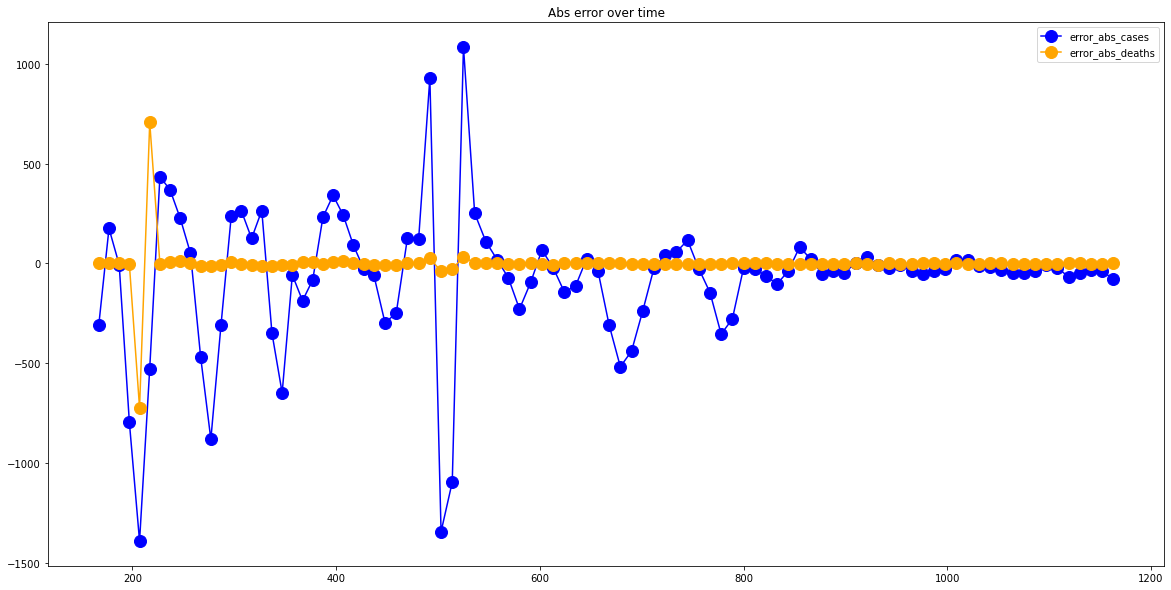

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11409.462686567163
RMSE =  15029.832939161515
-- Brazil performances for deaths --
MAE =  389.5970149253731
RMSE =  479.3175029734637


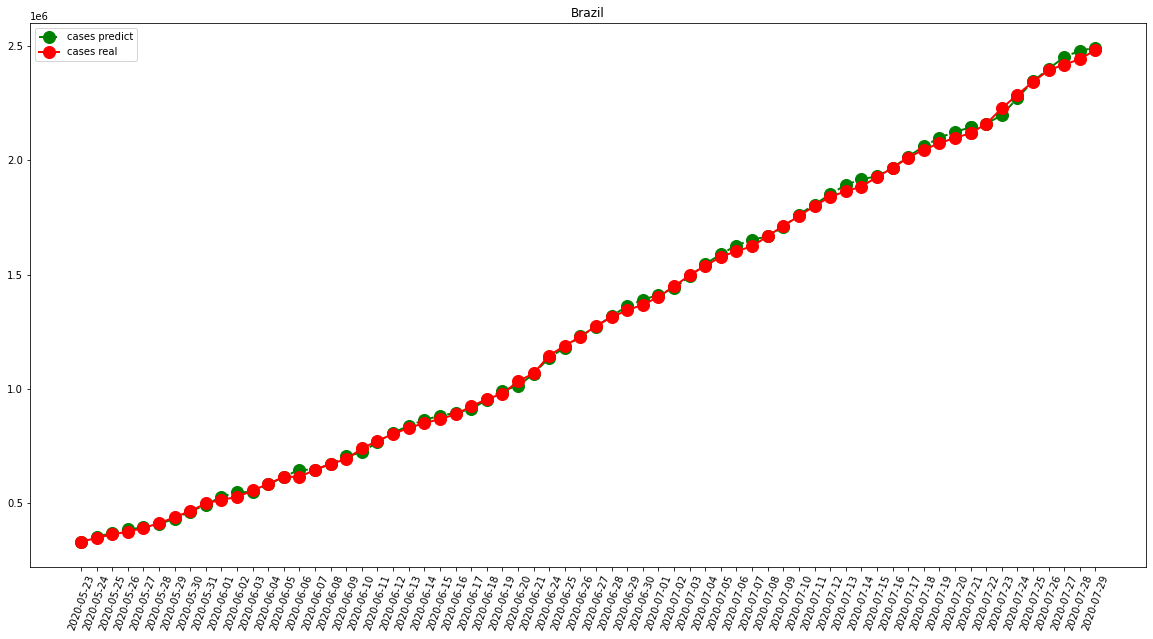

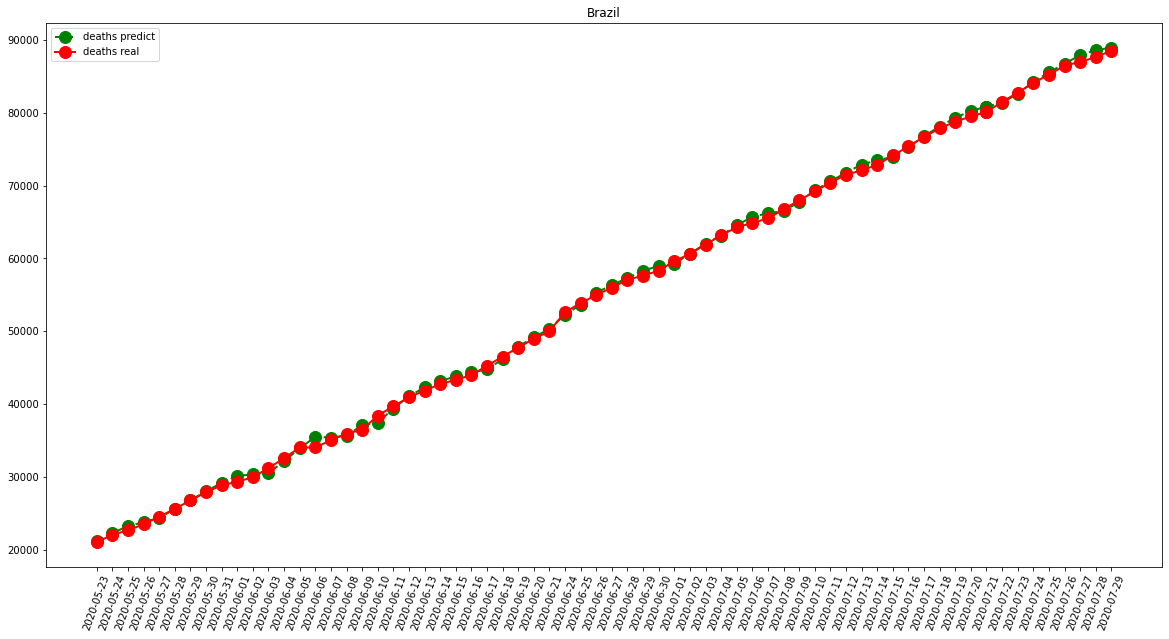

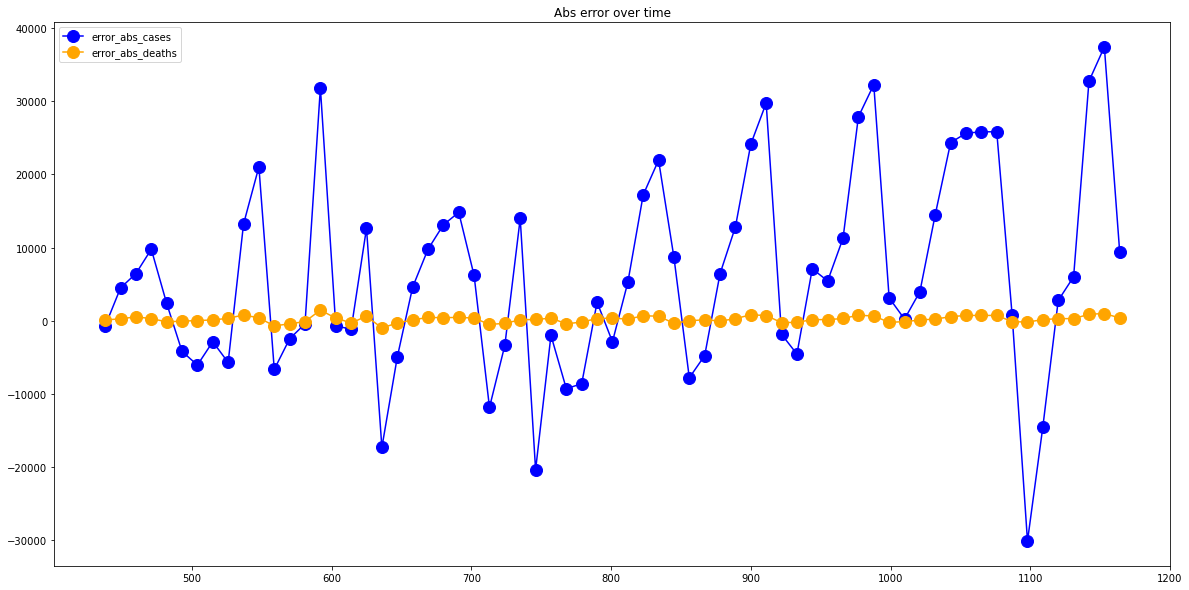

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)